In [1]:
import importlib
import local_support  

importlib.reload(local_support)


from local_support import *

Training for regression


In [2]:
cloud_dataset = np.load('datasets/train_subset_500k.npz')

In [3]:
X_train_set = cloud_dataset['X_train']
y_train_set = cloud_dataset['y_train']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_train_set, y_train_set, test_size=0.2, random_state=42)

# Kiểm tra kích thước của các tập dữ liệu
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
train_set = (X_train, y_train)

X_train shape: (400000, 2)
X_test shape: (100000, 2)
y_train shape: (400000,)
y_test shape: (100000,)


In [5]:

best_regressor, best_params  = cross_validate(
    train_data=(X_train_set, y_train_set), 
    model_class=regressors['knn'], 
    param_grid=param_grids_regressor['knn'], 
    metric='neg_mean_squared_error',  # Use the correct scoring for MSE
    num_fold=5
)

Average R²: 0.7044287804262518
Average MSE: 0.05503406748175621
Best R²: 0.7068738321812111


In [10]:
folder_path = 'model_train/regressor/500points'
file_path = os.path.join(folder_path, 'fill_nan_model_knn.pkl')
joblib.dump(best_regressor, file_path)

['model_train/regressor/500points/fill_nan_model_knn.pkl']

In [6]:
fill_nan_model = joblib.load('model_train/regressor/500points/fill_nan_model_gb.pkl')

In [12]:
y_pred = fill_nan_model.predict(X_test)

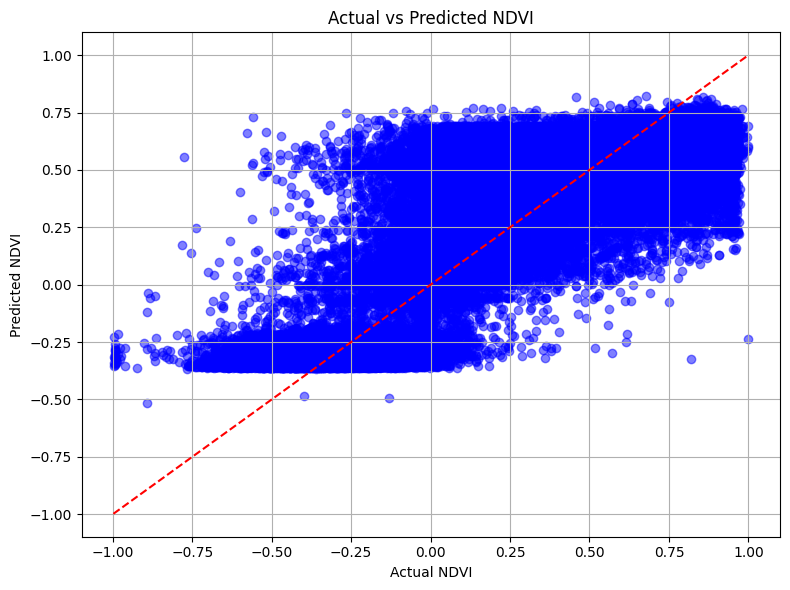

In [14]:
# Plotting actual vs predicted NDVI
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.xlabel('Actual NDVI')
plt.ylabel('Predicted NDVI')
plt.title('Actual vs Predicted NDVI')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 0.17415145601178833
Mean Squared Error (MSE): 0.04809948812078902
R² Score: 0.74246638572094


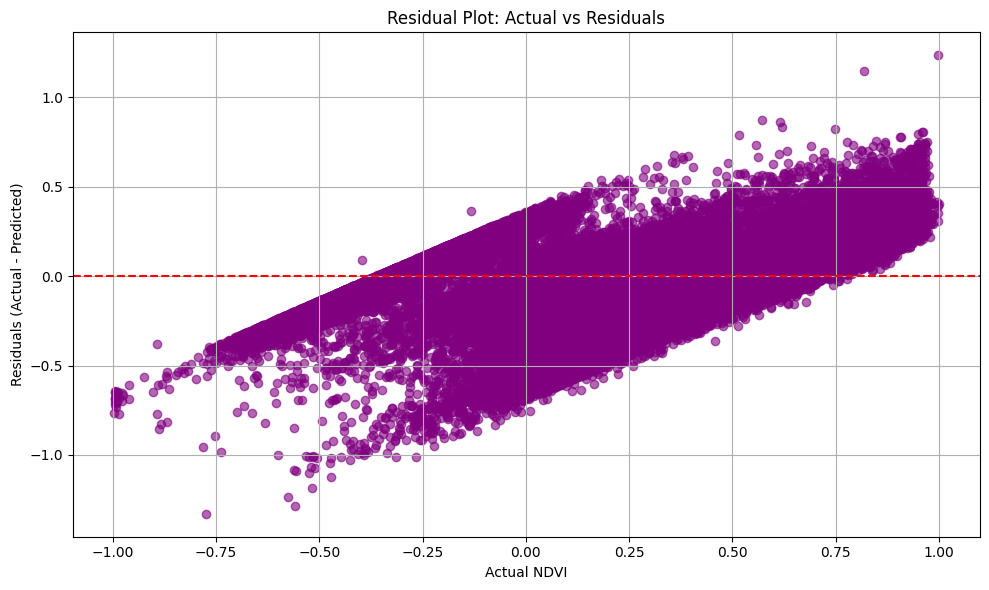

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate residuals (errors)
residuals = y_test - y_pred

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual NDVI')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot: Actual vs Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()


######################## ADD CNN MODEL TRAIN###################################


In [9]:
height = 128  # Example height of the image
width = 128   # Example width of the image
channels = 2 

In [ ]:
from tensorflow.keras import models, layers

# Create the model
model = models.Sequential()

# Input layer: expect 2 features (e.g., VH and VV)
model.add(layers.Input(shape=(2,)))

# Hidden layers
model.add(layers.Dense(64, activation='relu'))  # Hidden layer 1 with 64 neurons
model.add(layers.Dense(32, activation='relu'))  # Hidden layer 2 with 32 neurons

# Output layer for regression
model.add(layers.Dense(1))  # Output a single continuous value (e.g., NDVI)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_val.shape

(40960, 2)

In [19]:
from sklearn.preprocessing import StandardScaler

# Normalize the features (VH, VV)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val))


Epoch 1/50
5120/5120 [==============================] - 6s 1ms/step - loss: 0.1944 - val_loss: 0.0529
Epoch 2/50
5120/5120 [==============================] - 6s 1ms/step - loss: 0.0769 - val_loss: 0.0645
Epoch 3/50
5120/5120 [==============================] - 6s 1ms/step - loss: 0.0709 - val_loss: 0.0506
Epoch 4/50
5120/5120 [==============================] - 6s 1ms/step - loss: 0.0583 - val_loss: 0.2964
Epoch 5/50
5120/5120 [==============================] - 6s 1ms/step - loss: 0.0631 - val_loss: 0.0635
Epoch 6/50
5120/5120 [==============================] - 6s 1ms/step - loss: 0.0733 - val_loss: 0.0494
Epoch 7/50
5120/5120 [==============================] - 6s 1ms/step - loss: 0.0573 - val_loss: 0.0886
Epoch 8/50
5120/5120 [==============================] - 6s 1ms/step - loss: 0.0967 - val_loss: 0.0495
Epoch 9/50
5120/5120 [==============================] - 6s 1ms/step - loss: 0.1899 - val_loss: 0.0502
Epoch 10/50
5120/5120 [==============================] - 6s 1ms/step - loss: 0.089

In [16]:
model.save('model_train/regressor/500points/fill_nan_model_cnn.h5')

/env/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
from tensorflow.keras.models import load_model

# Load the entire model
fill_nan_model = load_model('model_train/regressor/500points/fill_nan_model_cnn.h5')

# Evaluate the loaded model on the test set (or any new data)
test_loss = fill_nan_model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}')




3125/3125 [==============================] - 3s 785us/step - loss: 0.0487
Test Loss: 0.04867715761065483


In [23]:
y_pred = fill_nan_model.predict(X_test)

3125/3125 [==============================] - 2s 745us/step


In [24]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 0.3707435131072998
Mean Squared Error (MSE): 0.21663890779018402
R² Score: -0.1599250330488995
